# Embedding Potential for Cs<sub>2</sub>UO<sub>2</sub>Cl<sub>4</sub>:

This notebook is meant to give an overview over the progress for developing the most physical meaningfull embedding potential of uranyl cation in Cs<sub>2</sub>UO<sub>2</sub>Cl<sub>4</sub>. This notebook is still in development and newer results will be added to this notebook frequently.

## Table of Contents:

1 [Performed Calculations](#Performed Calculations)

2 [Results](#results)

<div id='Performed Calculations'/>
## Performed Calculations 

The following calculations were performed using the PBE XC-functional an USPP from the PS library (version: 1.0.0) created with Quantum Espresso (QE version: 6.1).

For the subsystem calculations embedded Quantum Espresso were used in the newest version from the gitlab repository (https://gitlab.com/Pavanello/eqe).

The crystal data is based on the study of Watkin et al. (_Acta Cryst. A_ __1991__, C47, 2517-2519).

The calculations were performed using 14 subsystems

* 2 x UO<sup>2+</sup>
* 8 x Cl<sup>-</sup>
* 4 x Cs<sup>+</sup>

and the following pseudopotentials were used:

* U:  U.pbe-spfn-rrkjus_psl.1.0.0.UPF
* O:  O.pbe-n-rrkjus_psl.1.0.0.UPF
* Cl: Cl.pbe-n-rrkjus_psl.1.0.0.UPF
* Cs: Cs.pbe-spn-rrkjus_psl.1.0.0.UPF

For calculation which are done with a GGA + U method: U = 4.50 eV (from: _Phys. Review B_, __2009__, 79, 235125)

<div id='results'/>
## Results 


The following plot is showing k-point variation and Energy cut off vatiation against the calculated zero point energy:


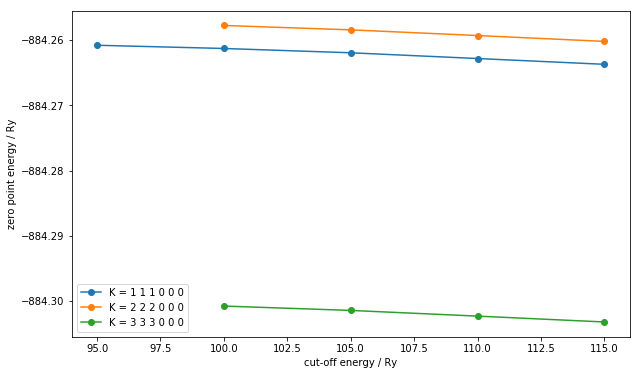

In [82]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

energy_cutoff1 = np.array([95, 100, 105, 110, 115])
energy1 = np.array([-884.26076091, -884.26125473, -884.26191638, -884.26279715, -884.26368351])

energy_cutoff2 = np.array([100, 105, 110, 115])
energy2 = np.array([-884.25772411, -884.25839757, -884.25926931, -884.26016860])

energy_cutoff3 = np.array([100, 105, 110, 115])
energy3 = np.array([-884.30077616, -884.30144553, -884.30232038, -884.30321875])

plt.plot(energy_cutoff1, energy1, label = 'K = 1 1 1 0 0 0', marker = 'o')
plt.plot(energy_cutoff2, energy2, label = 'K = 2 2 2 0 0 0', marker = 'o')
plt.plot(energy_cutoff3, energy3, label = 'K = 3 3 3 0 0 0', marker = 'o')
plt.xlabel('cut-off energy / Ry')
plt.ylabel('zero point energy / Ry')
plt.legend()
plt.show()

The following results are based on a cut off energy of 105 Ry. 

* Orbitals:

In a first step the Band-Energies for the different performed calculations with eQE are compared.

* Embedding Potential:

In the first figure it is shown a 2D cut plane orthogonal to the O-U-O bond axis in the cas of a cut of energy of 105 Ry and K-points = 111 000:


<img align="left" src="embed_cut.png" width = "500"> <img align="left" src="embed_cut_thermometer.png" width = "150">


<img align="left" src="embed_cut2.png" width = "500"> <img align="left" src="embed_cut_thermometer2.png" width = "150">

The same can be done with 1D plots in one particular direction. The first plot is shown the embedding potential in the direction of the U-O bond. The following plots are all created for a energy cut-off of 105 Ry but different K points:

| K   |           |
|----------|:----:|
| None |  111 000 |
| K1 |  222 000 |
| K2 |  333 000 |

In [2]:
from pbcpy.grid import Plot
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
from pbcpy.base import Coord
from pbcpy.base import Cell
import numpy as np
from pbcpy.base import pbcarray
from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
import  matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
GGA = PP('Ecut2/embeddingpot_GGA.pp').read()
GGAU = PP('Ecut2/embeddingpot_GGA_U.pp').read()
GGA_K1 = PP('Ecut2/embeddingpot_GGA_K1.pp').read()
GGA_K2 = PP('Ecut2/embeddingpot_GGA_K2.pp').read()

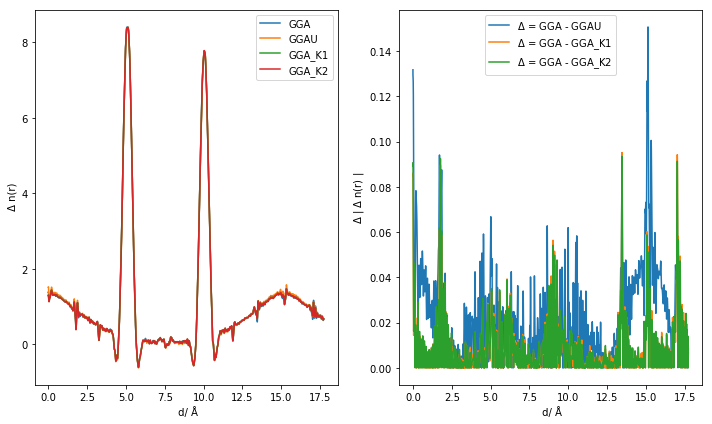

In [10]:
mpl.rcParams['figure.figsize'] = (10,6)


distance_scalar = 10

x0 = GGA.ions[2].pos
r0 = distance_scalar*GGA.ions[2].pos.d_mic(GGA.ions[1].pos)

gridpoints = 40000
d = (r0).length()*0.52918

scalar = d/gridpoints

plot_cut1D_GGA = GGA.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGAU = GGAU.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K1 = GGA_K1.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2 = GGA_K2.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)

xvalues = np.arange(0,gridpoints,1)


plt.subplot(1, 2, 1)

plt.plot(xvalues*scalar,plot_cut1D_GGA.values, label = 'GGA' )
plt.plot(xvalues*scalar,plot_cut1D_GGAU.values, label = 'GGAU' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K1.values, label = 'GGA_K1' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2.values, label = 'GGA_K2' )

plt.xlabel(' d/ Å')
plt.ylabel(' Δ n(r)')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGAU.values), label = '$\Delta$ = GGA - GGAU')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGA_K1.values), label = '$\Delta$ = GGA - GGA_K1')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGA_K2.values), label = '$\Delta$ = GGA - GGA_K2')

plt.xlabel(' d/ Å')
plt.ylabel('$\Delta$ | Δ n(r) |')
plt.legend()

plt.tight_layout()

plt.show()

In [87]:
corcoef_matrix1 = np.abs(np.corrcoef([plot_cut1D_GGA.values, plot_cut1D_GGAU.values, plot_cut1D_GGA_K1.values, plot_cut1D_GGA_K2.values]))
corcoef_matrix1

array([[ 1.        ,  0.99985598,  0.99995916,  0.99995867],
       [ 0.99985598,  1.        ,  0.99986872,  0.99986101],
       [ 0.99995916,  0.99986872,  1.        ,  0.99999954],
       [ 0.99995867,  0.99986101,  0.99999954,  1.        ]])

The second plot will show the the potential in a 45° to the U-O bond. This will direktly go throught the unranium atom in one of the corners of the crystal unit cell.

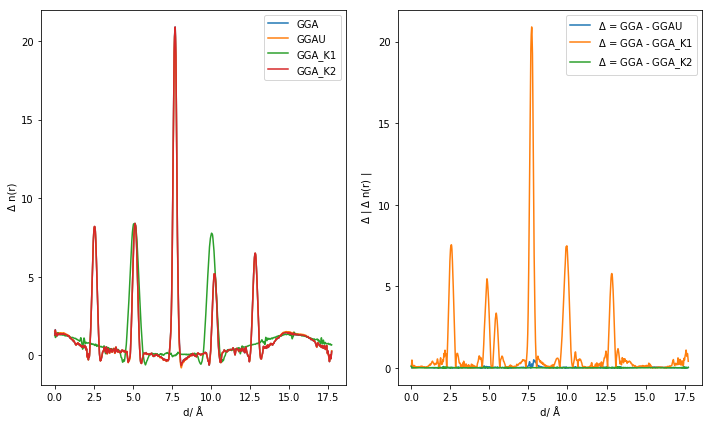

In [88]:
x0 = GGA.ions[2].pos
r0 = distance_scalar*Coord(pos=[2.16776215, 5, 2.55639449],cell=GGA.cell)
plot_cut1D_GGA = GGA.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGAU = GGAU.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2 = GGA_K1.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2 = GGA_K2.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)

plt.subplot(1, 2, 1)

plt.plot(xvalues*scalar, plot_cut1D_GGA.values, label = 'GGA')
plt.plot(xvalues*scalar, plot_cut1D_GGAU.values, label = 'GGAU')
plt.plot(xvalues*scalar, plot_cut1D_GGA_K1.values, label = 'GGA_K1')
plt.plot(xvalues*scalar, plot_cut1D_GGA_K2.values, label = 'GGA_K2')

plt.xlabel(' d/ Å ')
plt.ylabel(' Δ n(r)')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGAU.values), label = '$\Delta$ = GGA - GGAU')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGA_K1.values), label = '$\Delta$ = GGA - GGA_K1')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA.values-plot_cut1D_GGA_K2.values), label = '$\Delta$ = GGA - GGA_K2')

plt.xlabel(' d/ Å ')
plt.ylabel('$\Delta$ | Δ n(r) |')
plt.legend()
plt.tight_layout()

plt.show()

In [89]:
corcoef_matrix2 = np.abs(np.corrcoef([plot_cut1D_GGA.values, plot_cut1D_GGAU.values, plot_cut1D_GGA_K1.values, plot_cut1D_GGA_K2.values]))
corcoef_matrix2

array([[ 1.        ,  0.99976396,  0.22531307,  0.99998992],
       [ 0.99976396,  1.        ,  0.2295851 ,  0.99975074],
       [ 0.22531307,  0.2295851 ,  1.        ,  0.22504293],
       [ 0.99998992,  0.99975074,  0.22504293,  1.        ]])

Furthermore a comparison between different cut of energies need to be carried out:

In [90]:
GGA_K2_Ecut = PP('Ecut/embeddingpot_GGA_K2.pp').read()
GGA_K2_Ecut2 = PP('Ecut2/embeddingpot_GGA_K2.pp').read()
GGA_K2_Ecut3 = PP('Ecut3/embeddingpot_GGA_K2.pp').read()
GGA_K2_Ecut4 = PP('Ecut4/embeddingpot_GGA_K2.pp').read()

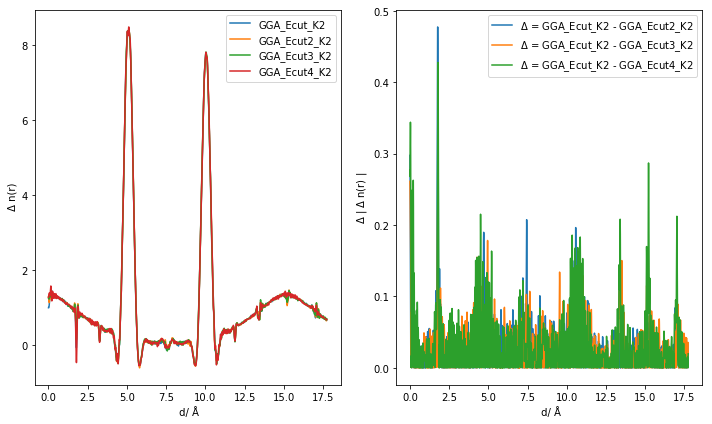

In [91]:
distance_scalar = 10

x0 = GGA.ions[2].pos
r0 = distance_scalar*GGA.ions[2].pos.d_mic(GGA.ions[1].pos)

gridpoints = 40000
d = (r0).length()*0.52918

scalar = d/gridpoints

plot_cut1D_GGA_K2_Ecut = GGA_K2_Ecut.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut2 = GGA_K2_Ecut2.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut3 = GGA_K2_Ecut3.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut4 = GGA_K2_Ecut4.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)

xvalues = np.arange(0,gridpoints,1)


plt.subplot(1, 2, 1)

plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut.values, label = 'GGA_Ecut_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut2.values, label = 'GGA_Ecut2_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut3.values, label = 'GGA_Ecut3_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut4.values, label = 'GGA_Ecut4_K2' )

plt.xlabel(' d/ Å')
plt.ylabel(' Δ n(r)')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut2.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut2_K2')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut3.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut3_K2')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut4.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut4_K2')

plt.xlabel(' d/ Å')
plt.ylabel('$\Delta$ | Δ n(r) |')
plt.legend()

plt.tight_layout()

plt.show()

Analysis try with correlation coeffitients:

In [92]:
corcoef_matrix3 = np.abs(np.corrcoef([plot_cut1D_GGA_K2_Ecut.values, plot_cut1D_GGA_K2_Ecut2.values, plot_cut1D_GGA_K2_Ecut3.values, plot_cut1D_GGA_K2_Ecut4.values]))
corcoef_matrix3              

array([[ 1.        ,  0.99956311,  0.99965132,  0.99935056],
       [ 0.99956311,  1.        ,  0.99958993,  0.99894864],
       [ 0.99965132,  0.99958993,  1.        ,  0.99936256],
       [ 0.99935056,  0.99894864,  0.99936256,  1.        ]])

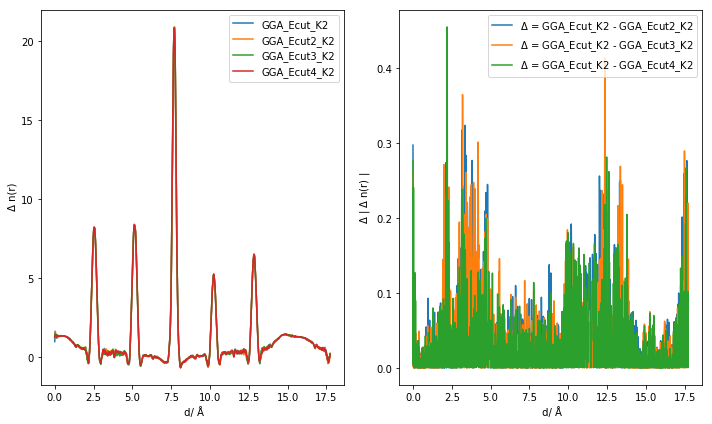

In [93]:
x0 = GGA.ions[2].pos
r0 = distance_scalar*Coord(pos=[2.16776215, 5, 2.55639449],cell=GGA.cell)


plot_cut1D_GGA_K2_Ecut = GGA_K2_Ecut.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut2 = GGA_K2_Ecut2.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut3 = GGA_K2_Ecut3.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGA_K2_Ecut4 = GGA_K2_Ecut4.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)

xvalues = np.arange(0,gridpoints,1)


plt.subplot(1, 2, 1)

plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut.values, label = 'GGA_Ecut_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut2.values, label = 'GGA_Ecut2_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut3.values, label = 'GGA_Ecut3_K2' )
plt.plot(xvalues*scalar,plot_cut1D_GGA_K2_Ecut4.values, label = 'GGA_Ecut4_K2' )

plt.xlabel(' d/ Å')
plt.ylabel(' Δ n(r)')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut2.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut2_K2')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut3.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut3_K2')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGA_K2_Ecut.values-plot_cut1D_GGA_K2_Ecut4.values), label = '$\Delta$ = GGA_Ecut_K2 - GGA_Ecut4_K2')

plt.xlabel(' d/ Å')
plt.ylabel('$\Delta$ | Δ n(r) |')
plt.legend()

plt.tight_layout()

plt.show()

In [94]:
corcoef_matrix3 = np.abs(np.corrcoef([plot_cut1D_GGA_K2_Ecut.values, plot_cut1D_GGA_K2_Ecut2.values, plot_cut1D_GGA_K2_Ecut3.values, plot_cut1D_GGA_K2_Ecut4.values]))
corcoef_matrix3

array([[ 1.        ,  0.9996142 ,  0.99962591,  0.99972022],
       [ 0.9996142 ,  1.        ,  0.99960191,  0.99962659],
       [ 0.99962591,  0.99960191,  1.        ,  0.99963415],
       [ 0.99972022,  0.99962659,  0.99963415,  1.        ]])

* Verification of GGA+U calculation:

To verify the results we obtain with a GGA+U calculation in the case of eQE we did a test calculation of a single uranyl subsystem in the case of eQE and a calculation with this system in the case of QE.

Settings: Ecutwfc = 105; Ecutrho = 1050.

From both calculation the same zero point enrgy is obtained (-192.97676757 Ry) and the same band energies:


| Band   | Energy / eV |
|----------|:----:|
| 1 | -55.6899 |
| 2 | -34.7765 |
| 3 | -30.3828 |
| 4 | -30.3804 |
| 5 | -27.6689 |
| 6 | -21.9995 |
| 7 | -14.8992 |
| 8 | -14.8121 |
| 9 | -14.2987 |
| 10 | -14.2887 |
| 11 | -13.9491 |
| 12 | -13.9002|


Furthermore the orbitals show a good agreement aswell.